In [1]:

import os
import pandas as pd 
import gpxpy


In [5]:
file = 'D:\\GitHub\\track_record\\test_data\\test_run.gpx'
gps_file = open(file,'r')
gpx = gpxpy.parse(gps_file)

In [6]:
# have a look at the tracks, segments and points

print("{} track(s)".format(len(gpx.tracks)))
track = gpx.tracks[0]

print("{} segment(s)".format(len(track.segments)))
segment = track.segments[0]

print("{} point(s)".format(len(segment.points)))

1 track(s)
1 segment(s)
1553 point(s)


In [25]:
help(segment)

Help on GPXTrackSegment in module gpxpy.gpx object:

class GPXTrackSegment(builtins.object)
 |  GPXTrackSegment(points: Union[List[gpxpy.gpx.GPXTrackPoint], NoneType] = None) -> None
 |  
 |  Methods defined here:
 |  
 |  __init__(self, points: Union[List[gpxpy.gpx.GPXTrackPoint], NoneType] = None) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self) -> str
 |      Return repr(self).
 |  
 |  add_elevation(self, delta: float) -> None
 |      Adjusts elevation data for segment.
 |      
 |      Parameters
 |      ----------
 |      delta : float
 |          Elevation delta in meters to apply to track
 |  
 |  add_missing_data(self, get_data_function: Callable[[gpxpy.gpx.GPXTrackPoint], Any], add_missing_function: Callable[[List[gpxpy.gpx.GPXTrackPoint], gpxpy.gpx.GPXTrackPoint, gpxpy.gpx.GPXTrackPoint, List[float]], NoneType]) -> None
 |      Calculate missing data.
 |      
 |      Parameters
 |      ----------
 |      get_data_functio

In [64]:
segment.points[0].distance_3d()

TypeError: distance_3d() missing 1 required positional argument: 'location'

In [134]:
a = gpx.get_points_data()

a[1500].distance_from_start

a[12]

PointData(point=GPXTrackPoint(39.214184, -76.889581, elevation=134.1, time=datetime.datetime(2020, 5, 24, 19, 9, 1, tzinfo=SimpleTZ("Z"))), distance_from_start=114.11441051581076, track_no=0, segment_no=0, point_no=12)

In [162]:
data = []
for p_dat in a:
    data.append([p_dat.point.latitude, p_dat.point.longitude, p_dat.point.elevation, p_dat.point.time,
                 p_dat.distance_from_start, gpx.tracks[p_dat.track_no].segments[p_dat.segment_no].get_speed(p_dat.point_no),
                 p_dat.track_no, p_dat.segment_no, p_dat.point_no, file])

In [169]:
df = pd.DataFrame(data, columns=['Latitude','Longitude','Elevation','time','distance','speed','track','segment','point', 'filename'])
df

,Latitude,Longitude,Elevation,time,distance,speed,track,segment,point,filename
0,39.213505,-76.890457,132.0,2020-05-24 19:08:17+00:00,0.000000,0.891585,0,0,0,D:\GitHub\track_record\test_data\test_run.gpx
1,39.213603,-76.890268,132.0,2020-05-24 19:08:39+00:00,19.614843,2.355885,0,0,1,D:\GitHub\track_record\test_data\test_run.gpx
2,39.213635,-76.890252,132.0,2020-05-24 19:08:40+00:00,23.435029,3.887694,0,0,2,D:\GitHub\track_record\test_data\test_run.gpx
3,39.213615,-76.890164,132.1,2020-05-24 19:08:42+00:00,31.345435,3.026722,0,0,3,D:\GitHub\track_record\test_data\test_run.gpx
4,39.213631,-76.890094,132.1,2020-05-24 19:08:45+00:00,37.640155,2.219116,0,0,4,D:\GitHub\track_record\test_data\test_run.gpx
...,...,...,...,...,...,...,...,...,...,...
1548,39.209520,-76.878246,133.5,2020-05-24 20:06:56+00:00,10010.694018,2.620073,0,0,1548,D:\GitHub\track_record\test_data\test_run.gpx
1549,39.209554,-76.878288,133.6,2020-05-24 20:06:58+00:00,10015.934163,2.621926,0,0,1549,D:\GitHub\track_record\test_data\test_run.gpx
1550,39.209595,-76.878318,133.7,2020-05-24 20:07:00+00:00,10021.181722,2.621926,0,0,1550,D:\GitHub\track_record\test_data\test_run.gpx
1551,39.209629,-76.878360,133.8,2020-05-24 20:07:02+00:00,10026.421865,2.729343,0,0,1551,D:\GitHub\track_record\test_data\test_run.gpx


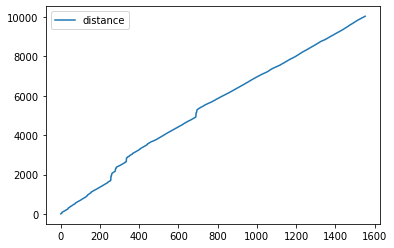

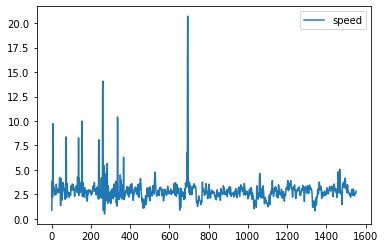

In [170]:
df.plot(y='distance')
df.plot(y='speed')

In [185]:
import plotly.express as px

fig = px.line_mapbox(df,lat='Latitude',lon='Longitude')
fig.update_layout(mapbox_style='carto-positron')
fig.show()

In [201]:
import plotly.graph_objects as go

fig2 = go.Figure(go.Scattermapbox(mode='lines',lon=df.Longitude,lat=df.Latitude))

fig2.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lon': -76.890457, 'lat': 39.213505},
        'style': "carto-positron",
        'zoom': 12})

fig2.show()

In [203]:
fig2.write_html(file='test.html')